In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

      age     bmi  children  sex_male  smoker_yes
1163   18  28.215         0         0           0
196    39  32.800         0         0           0
438    52  46.750         5         0           0
183    44  26.410         0         0           0
1298   33  27.455         2         1           0
...   ...     ...       ...       ...         ...
763    27  26.030         0         1           0
835    42  35.970         2         1           0
1216   40  25.080         0         1           0
559    19  35.530         0         1           0
684    33  18.500         1         0           0

[936 rows x 5 columns]
          charges
1163   2200.83085
196    5649.71500
438   12592.53450
183    7419.47790
1298   5261.46945
...           ...
763    3070.80870
835    7160.33030
1216   5415.66120
559    1646.42970
684    4766.02200

[936 rows x 1 columns]
      age     bmi  children  sex_male  smoker_yes
578    52  30.200         1         1           0
610    47  29.370         1         

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train
X_test

array([[ 0.89459283, -0.08863026, -0.06746417,  1.02378711, -0.50466988],
       [ 0.53757957, -0.22180837, -0.06746417, -0.97676557, -0.50466988],
       [ 0.60898222,  1.57449152,  0.76341038,  1.02378711,  1.98149332],
       ...,
       [ 1.10880078,  1.20785059, -0.89833872,  1.02378711, -0.50466988],
       [ 1.75142463,  1.34905148, -0.06746417,  1.02378711, -0.50466988],
       [ 1.60861933, -0.92299913, -0.89833872, -0.97676557, -0.50466988]])

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(criterion='squared_error',max_features='sqrt',n_estimators=100)
regressor=regressor.fit(X_train,Y_train)

C:\Users\Pandiyan\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [10]:
Y_predict=regressor.predict(X_test)
Y_predict

array([10641.5645134 ,  9551.9241038 , 42740.8580325 , 14055.5404223 ,
       10479.9093904 , 11970.6206248 ,  2326.543095  , 11510.6927464 ,
        7785.8460219 ,  5990.8966342 ,  6182.1374664 , 14529.9281078 ,
        8671.6986623 ,  6644.6611735 , 22655.2589474 , 12448.6846702 ,
       14185.7088468 ,  4575.971786  ,  7291.8881256 , 31314.4873192 ,
       24841.2960315 , 16524.2317376 , 10829.2982481 , 26489.1523435 ,
        3392.9513632 ,  6460.1922732 ,  4774.4714876 ,  8525.6503266 ,
        3694.756103  , 12568.4332586 ,  8388.42519   , 45150.6717641 ,
       15846.990481  , 13292.0456783 , 18447.3010657 ,  5130.9461212 ,
        9781.6929387 , 38585.4582219 , 38166.7962443 ,  2408.6591261 ,
        5791.8652863 ,  3882.9975841 , 20699.2544984 , 47410.8072027 ,
       36431.92964265,  4037.0647189 , 12585.8688622 ,  6913.4719812 ,
        5961.9357977 , 13646.9577892 ,  4148.1757364 ,  5084.3358158 ,
       27417.1552529 , 46077.1870856 , 11932.4122363 , 10188.4315689 ,
      

In [11]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_predict)
r2

0.873351997781679

In [27]:
import numpy as np
Ytest= np.array(Y_test).flatten()
Ypredict= np.array(Y_predict).flatten()
residuals=Ytest-Ypredict
residuals

array([-9.17034513e+02, -1.00423280e+03,  2.96116432e+03, -1.10546922e+03,
       -8.35656890e+02, -7.47028137e+03, -1.28353245e+02, -7.39545964e+01,
       -2.48682122e+02, -5.65873284e+02,  5.70900534e+02, -4.03598231e+03,
       -1.33395066e+03, -2.45956327e+03, -4.34451695e+03, -1.74604227e+03,
       -1.66210405e+03, -1.08542269e+03, -8.34044726e+02,  2.16132983e+03,
       -8.73912981e+02, -3.88085394e+03,  1.22162679e+04, -3.42373164e+03,
       -1.71831906e+03, -1.79258462e+03, -1.04184639e+03, -8.42980327e+02,
        6.18654970e+01, -4.15497021e+03, -3.28746090e+02,  3.81957584e+03,
       -2.86763248e+03,  7.33823783e+03, -3.87541027e+03, -9.93423421e+02,
       -1.43452864e+03,  1.26091009e+04,  1.83653601e+03, -5.28172126e+02,
       -3.33818836e+02, -1.01587798e+03, -5.49931598e+02,  8.56872473e+01,
       -2.82446143e+02,  2.19818858e+04,  7.16351452e+03,  2.74378688e+01,
       -1.24373225e+03,  8.54547932e+03, -1.24868639e+03,  1.37543678e+04,
       -3.84888325e+03,  

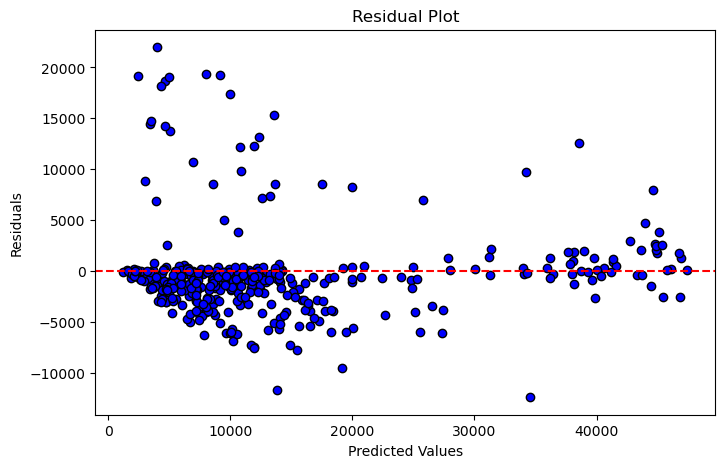

In [31]:
import matplotlib.pyplot as plt
# Plotting residuals
plt.figure(figsize=(8, 5))
plt.scatter(Ypredict, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()